In [1]:
import pandas as pd
import csv

In [6]:
prefex = '/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/water_runoff_sample/Total_Phosphorus/Water_sample_runoff_citrus_Total_Phosphorus.csv'

df = pd.read_csv(prefex)
print(df.columns)

Index(['Date', 'NPK', 'PK', 'NK', 'CK', 'OF', 'Dew Point Temperature (F)',
       'Average Temperature (F)', 'Visibility (mi)',
       'Average Wind Speed (knots)', 'Maximum Sustained Wind Speed (knots)',
       'Maximum Gust (knots)', 'Maximum Temperature (F)',
       'Minimum Temperature (F)', 'Precipitation (in)'],
      dtype='object')


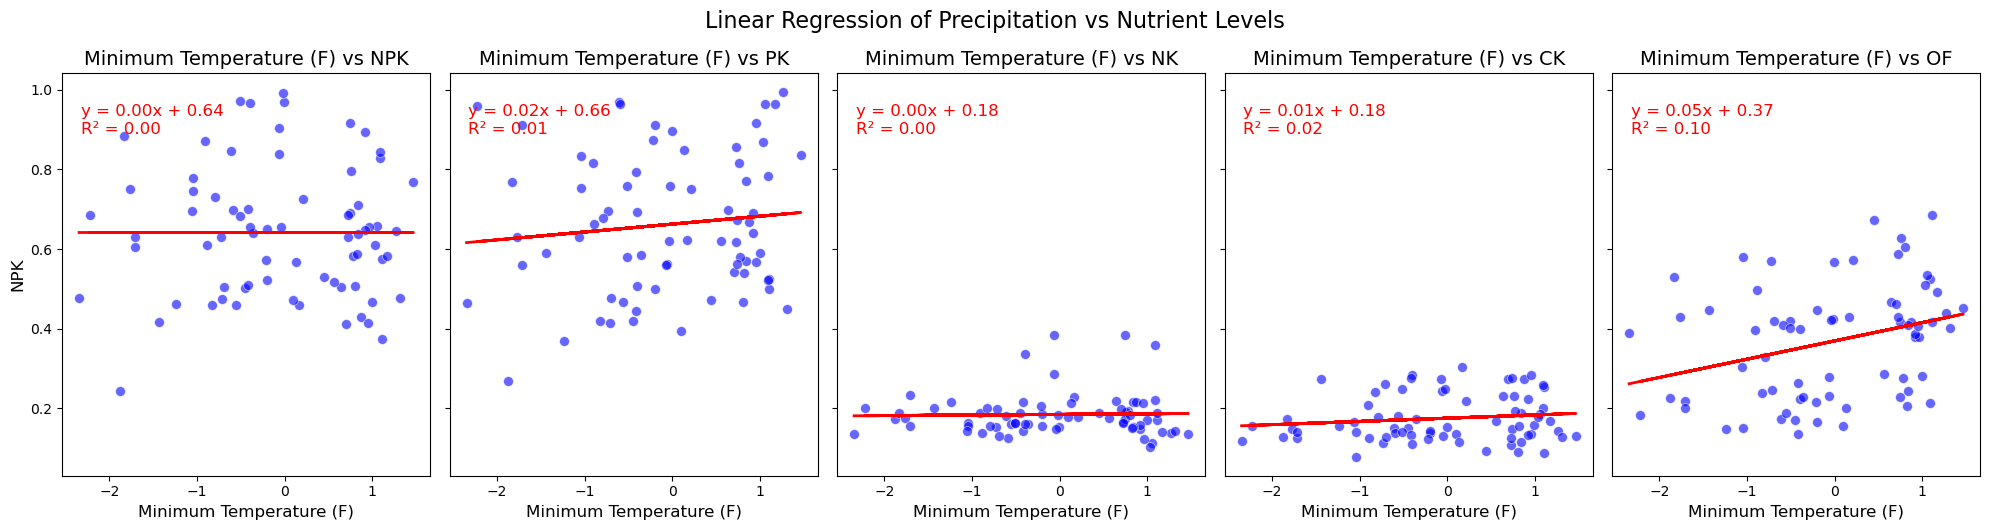

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Load the dataset
prefex = "/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/water_runoff_sample/Total_Phosphorus/Water_sample_runoff_citrus_Total_Phosphorus.csv"
df = pd.read_csv(prefex)

# Select relevant columns
x_var = 'Minimum Temperature (F)'
y_vars = ['NPK', 'PK', 'NK', 'CK', 'OF']

# Create subplots
fig, axes = plt.subplots(1, len(y_vars), figsize=(20, 5), sharex=True, sharey=True)

# Loop through each variable and perform linear regression
for i, y_var in enumerate(y_vars):
    x = df[x_var]
    y = df[y_var]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r2 = r_value ** 2

    # Plot scatter plot and regression line
    sns.scatterplot(x=x, y=y, ax=axes[i], s=50, color='blue', alpha=0.6)
    axes[i].plot(x, slope * x + intercept, color='red', linewidth=2)

    # Add title, labels, and R² text
    axes[i].set_title(f'{x_var} vs {y_var}', fontsize=14)
    axes[i].set_xlabel(x_var, fontsize=12)
    axes[i].set_ylabel(y_var, fontsize=12)
    axes[i].annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.2f}", 
                     xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='red')

# Adjust layout and show plot
plt.tight_layout()
plt.suptitle("Linear Regression of Precipitation vs Nutrient Levels", fontsize=16, y=1.05)
plt.show()
